In [22]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import ShuffleSplit

In [23]:
#Import Data
chicago_df = pd.read_excel("Resources/chicago_case_schiller.xlsx")
national_df = pd.read_excel("Resources/national_case_schiller.xlsx")
interest_df = pd.read_excel("Resources/Mortgage_Rate_National.xlsx")
cookunemployment = pd.read_excel("Resources/Cook_County_Unemployment.xlsx")
nationalunemployment = pd.read_excel("Resources/National_unemployment.xlsx")

#Clean and merge data together
interest_df['Year'] = pd.DatetimeIndex(interest_df['Date']).year
interest_df['Month'] = pd.DatetimeIndex(interest_df['Date']).month
interest_df = interest_df[["Date", "Year", "Month", "Mortgage Interest Rate"]]
interest_df = interest_df.groupby(['Year','Month']).mean()

house_price_index = chicago_df.merge(national_df, how='inner', on='Date')
house_price_index['Year'] = pd.DatetimeIndex(house_price_index['Date']).year
house_price_index['Month'] = pd.DatetimeIndex(house_price_index['Date']).month
house_price_index = house_price_index[["Date","Month", "Year", "Chicago Home Price Index", "National Home Price Index"]]

unemployment= cookunemployment.merge(nationalunemployment, how='inner', on='Date')
unemployment['Year'] = pd.DatetimeIndex(unemployment['Date']).year
unemployment['Month'] = pd.DatetimeIndex(unemployment['Date']).month
unemployment = unemployment[["Date","Month", "Year", "National Unemployment Rate", "Cook County Unemployment Rate"]]

priceunemploymentdf = house_price_index.merge(unemployment, how='inner', on=['Date', 'Month', 'Year'])

priceunemploymentdf = priceunemploymentdf[["Year", "Month", "Chicago Home Price Index", "National Home Price Index", "National Unemployment Rate", "Cook County Unemployment Rate"]]

merged_df = priceunemploymentdf.merge(interest_df, how='inner', on=['Year', 'Month'])

In [24]:
merged_df

,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate
0,1990,1,69.355887,76.897,5.4,7.6,9.8950
1,1990,2,68.700554,77.053,5.3,7.2,10.1975
2,1990,3,68.904077,77.200,5.2,7.0,10.2680
3,1990,4,69.475721,77.277,5.4,7.4,10.3700
4,1990,5,69.995388,77.297,5.4,7.0,10.4775
...,...,...,...,...,...,...,...
371,2020,12,155.457127,235.568,6.7,9.4,2.6840
372,2021,1,156.633251,238.555,6.3,9.8,2.7350
373,2021,2,157.326126,241.624,6.2,9.5,2.8100
374,2021,3,158.730817,245.303,6.0,8.4,3.0825


In [39]:
cleaned_df = pd.read_excel("Resources/cleanbaseline.xlsx")
cleaned_df

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate
0,0,1990,1,69.355887,76.897,5.4,7.6,9.8950
1,1,1990,2,68.700554,77.053,5.3,7.2,10.1975
2,2,1990,3,68.904077,77.200,5.2,7.0,10.2680
3,3,1990,4,69.475721,77.277,5.4,7.4,10.3700
4,4,1990,5,69.995388,77.297,5.4,7.0,10.4775
...,...,...,...,...,...,...,...,...
371,371,2020,12,155.457127,235.568,6.7,9.4,2.6840
372,372,2021,1,156.633251,238.555,6.3,9.8,2.7350
373,373,2021,2,157.326126,241.624,6.2,9.5,2.8100
374,374,2021,3,158.730817,245.303,6.0,8.4,3.0825


In [26]:
#grouping by year to find summary stats 
grouped_year = cleaned_df.groupby(['Year'])
grouped_year.head()

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate
0,0,1990,1,69.355887,76.897,5.4,7.6,9.8950
1,1,1990,2,68.700554,77.053,5.3,7.2,10.1975
2,2,1990,3,68.904077,77.200,5.2,7.0,10.2680
3,3,1990,4,69.475721,77.277,5.4,7.4,10.3700
4,4,1990,5,69.995388,77.297,5.4,7.0,10.4775
...,...,...,...,...,...,...,...,...
364,364,2020,5,146.087329,217.838,13.3,16.8,3.2325
372,372,2021,1,156.633251,238.555,6.3,9.8,2.7350
373,373,2021,2,157.326126,241.624,6.2,9.5,2.8100
374,374,2021,3,158.730817,245.303,6.0,8.4,3.0825


In [27]:
#Creating a summary table grouped by year
Chicago_HPI_mean = grouped_year["Chicago Home Price Index"].mean()
Chicago_HPI_median = grouped_year["Chicago Home Price Index"].median()
Chicago_HPI_variance = grouped_year["Chicago Home Price Index"].var()
Chicago_HPI_std = grouped_year["Chicago Home Price Index"].std()
Chicago_HPI_SEM = grouped_year["Chicago Home Price Index"].sem()
# Assemble the resulting series into a single summary dataframe.
summary_year = pd.DataFrame({"Chicago HPI Mean":Chicago_HPI_mean,
             "Chicago HPI Median":Chicago_HPI_median,
             "Chicago HPI Variance":Chicago_HPI_variance,
             "Chicago HPI Standard Deviation":Chicago_HPI_std,
             "Chicago HPI SEM":Chicago_HPI_SEM})
summary_year.head(32)

,Chicago HPI Mean,Chicago HPI Median,Chicago HPI Variance,Chicago HPI Standard Deviation,Chicago HPI SEM
Year,,,,,
1990,70.108448,70.415354,0.652329,0.807669,0.233154
1991,71.645060,71.489430,0.417517,0.646155,0.186529
1992,74.519186,74.515961,0.989998,0.994987,0.287228
1993,77.265016,77.421023,1.039274,1.019448,0.294289
1994,80.814441,80.637620,0.411458,0.641450,0.185171
1995,82.852594,82.681882,0.501327,0.708045,0.204395
1996,85.141397,85.192918,0.633000,0.795613,0.229674
1997,87.496707,87.073647,0.905239,0.951440,0.274657
1998,91.514367,91.685210,0.735694,0.857726,0.247604


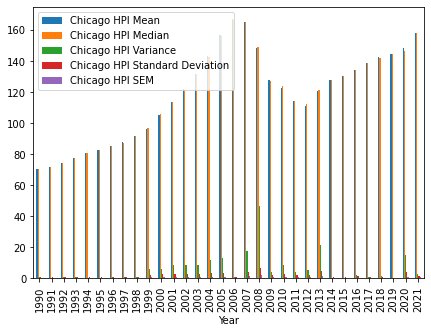

In [28]:
summary_year.plot(kind="bar", figsize=(7,5))
plt.show()

In [37]:
# Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    # Return the score
    return score

In [38]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

NameError: name 'features' is not defined